In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [3]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [13]:

test = pd.read_csv('/content/drive/MyDrive/csvfiles/test.csv')
train = pd.read_csv('/content/drive/MyDrive/csvfiles/train.csv')
train.head(11)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


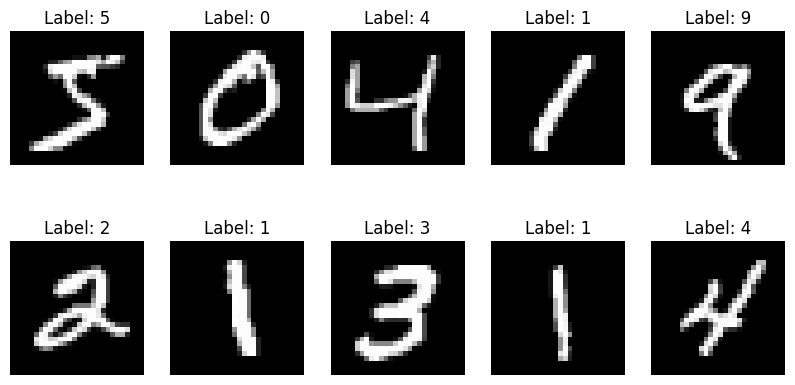

In [8]:

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

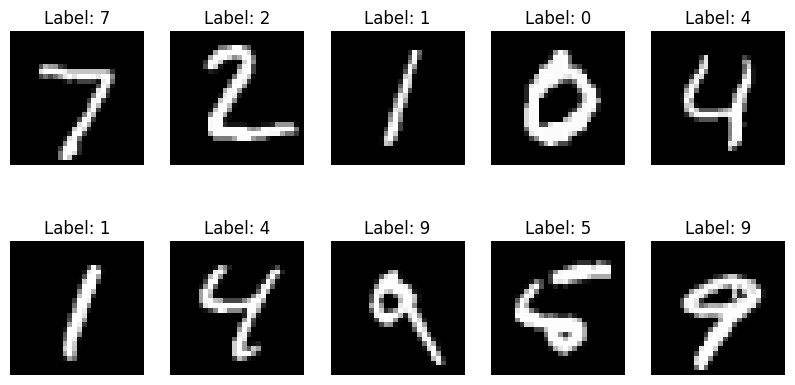

In [ ]:

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

In [ ]:

X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [ ]:

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


KNN Validation Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



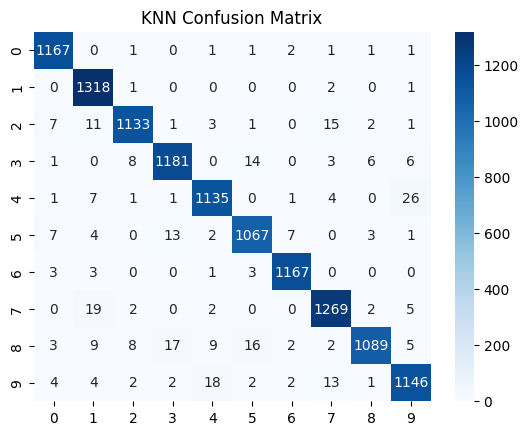

In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9352
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



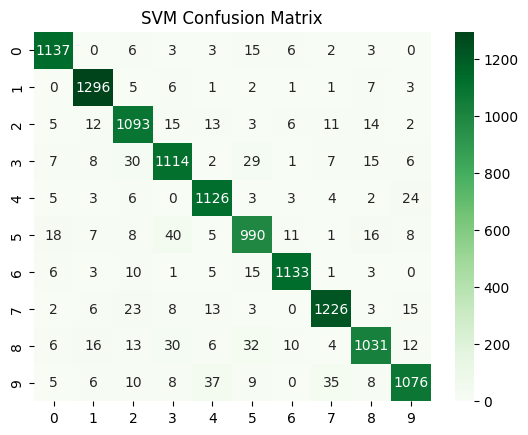

In [ ]:

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:

y_test_pred_svm = svm_model.predict(X_test_flat)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

SVM Test Accuracy: 0.9351


In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))

SVM Validation Accuracy: 0.9776
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_split, y_train_split)

y_val_pred_lr = lr.predict(X_val)

lr_acc = accuracy_score(y_val, y_val_pred_lr)
print(f'Logistic Regression Validation Accuracy: {lr_acc:.4f}')

print(classification_report(y_val, y_val_pred_lr))

Logistic Regression Validation Accuracy: 0.9222
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.90      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.88      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.93      0.93      0.93      1299
           8       0.90      0.87      0.88      1160
           9       0.90      0.90      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_split, y_train_split)

y_val_pred_rf = rf.predict(X_val)

rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Classifier Validation Accuracy: {rf_acc:.4f}')

print(classification_report(y_val, y_val_pred_rf))

Random Forest Classifier Validation Accuracy: 0.9686
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.98      0.99      0.99      1322
           2       0.95      0.97      0.96      1174
           3       0.97      0.95      0.96      1219
           4       0.96      0.97      0.97      1176
           5       0.96      0.96      0.96      1104
           6       0.98      0.98      0.98      1177
           7       0.97      0.96      0.97      1299
           8       0.96      0.96      0.96      1160
           9       0.96      0.95      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=70)  # Reduce to 70 principal components
X_train_pca = pca.fit_transform(X_train_split)
X_val_pca = pca.transform(X_val)

In [ ]:
print(X_train_pca.shape)


(48000, 70)


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_pca, y_train_split)

y_val_pred_knn = knn_model.predict(X_val_pca)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))

KNN Validation Accuracy: 0.9764
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.98      1.00      0.99      1322
           2       0.97      0.98      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.98      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.98      1299
           8       0.98      0.96      0.97      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train_split)

y_val_pred_svm = svm_model.predict(X_val_pca)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))

SVM Validation Accuracy: 0.9389
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.92      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.91      0.90      0.90      1104
           6       0.97      0.97      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.92      0.91      0.92      1160
           9       0.95      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000



In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_pca, y_train_split)

y_val_pred_svm = svm_model.predict(X_val_pca)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))

SVM Validation Accuracy: 0.9826
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.97      0.99      0.98      1174
           3       0.99      0.97      0.98      1219
           4       0.97      0.99      0.98      1176
           5       0.98      0.98      0.98      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.98      0.98      0.98      1160
           9       0.98      0.97      0.98      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train_split)

y_val_pred_dt = dt.predict(X_val_pca)

dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'Decision Tree Validation Accuracy: {dt_acc:.4f}')

print(classification_report(y_val, y_val_pred_dt))

Decision Tree Validation Accuracy: 0.8348
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1175
           1       0.95      0.97      0.96      1322
           2       0.83      0.84      0.83      1174
           3       0.80      0.79      0.79      1219
           4       0.80      0.80      0.80      1176
           5       0.75      0.76      0.76      1104
           6       0.89      0.89      0.89      1177
           7       0.87      0.86      0.87      1299
           8       0.77      0.76      0.76      1160
           9       0.76      0.77      0.77      1194

    accuracy                           0.83     12000
   macro avg       0.83      0.83      0.83     12000
weighted avg       0.83      0.83      0.83     12000



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca, y_train_split)

y_val_pred_lr = lr.predict(X_val_pca)

lr_acc = accuracy_score(y_val, y_val_pred_lr)
print(f'Logistic Regression Validation Accuracy: {lr_acc:.4f}')

print(classification_report(y_val, y_val_pred_lr))

Logistic Regression Validation Accuracy: 0.9160
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.88      0.89      1219
           4       0.91      0.94      0.92      1176
           5       0.87      0.86      0.86      1104
           6       0.95      0.95      0.95      1177
           7       0.93      0.93      0.93      1299
           8       0.88      0.87      0.88      1160
           9       0.90      0.89      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.91      0.92      0.91     12000
weighted avg       0.92      0.92      0.92     12000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train_split)

y_val_pred_rf = rf.predict(X_val_pca)

rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Classifier Validation Accuracy: {rf_acc:.4f}')

print(classification_report(y_val, y_val_pred_rf))

Random Forest Classifier Validation Accuracy: 0.9523
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1175
           1       0.98      0.98      0.98      1322
           2       0.94      0.96      0.95      1174
           3       0.93      0.93      0.93      1219
           4       0.94      0.96      0.95      1176
           5       0.94      0.94      0.94      1104
           6       0.97      0.98      0.97      1177
           7       0.96      0.96      0.96      1299
           8       0.94      0.92      0.93      1160
           9       0.94      0.93      0.93      1194

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [14]:
from tensorflow.keras.utils import to_categorical

X = train.drop('label', axis=1).to_numpy()
y = train['label'].to_numpy()

X = X / 255.0

X = X.reshape(-1, 28, 28, 1)

y = to_categorical(y, 10)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

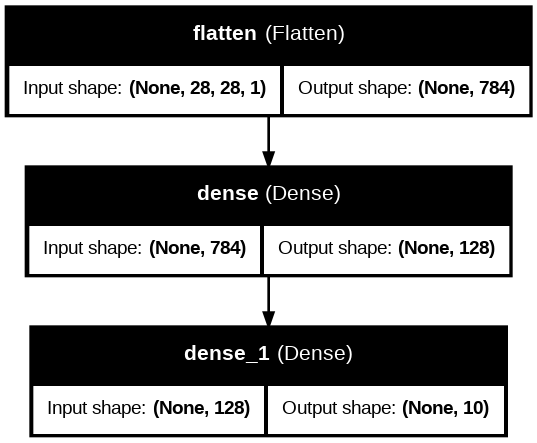

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=96, rankdir='TB')

In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8490 - loss: 0.5304 - val_accuracy: 0.9380 - val_loss: 0.2094
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9557 - loss: 0.1548 - val_accuracy: 0.9620 - val_loss: 0.1300
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9735 - loss: 0.0937 - val_accuracy: 0.9667 - val_loss: 0.1113
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9791 - loss: 0.0742 - val_accuracy: 0.9670 - val_loss: 0.1082
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9841 - loss: 0.0520 - val_accuracy: 0.9679 - val_loss: 0.1054
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9883 - loss: 0.0410 - val_accuracy: 0.9727 - val_loss: 0.0958
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9914 - loss: 0.0310 - val_accuracy: 0.9715 - val_loss: 0.0956
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9923 - loss: 0.0245 -

In [20]:
def history_plot(history, model_name='Model'):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left');

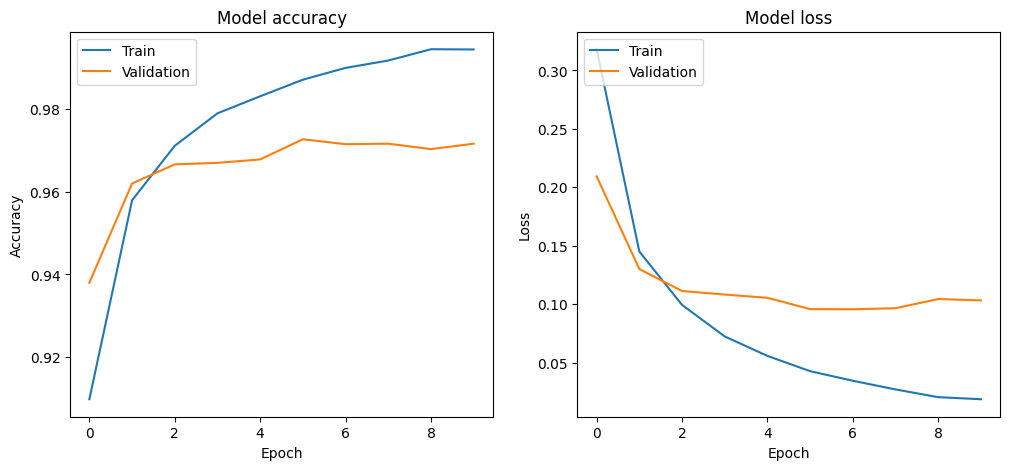

In [21]:
history_plot(history)
